# Breast Cancer Wisconsin (Disgnostic) Data Set

Example of using K-NN classifier 

[Source: UCI](http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29)

[Data Set info](http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.names)

***

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Load and Process Data

In [2]:
homedir = os.path.expanduser('~')

col = ['id', 'Clump Thickness', 'Uniformity of Cell Size', 
       'Uniformity of Cell Shape', 'Marginal Adhesion', 
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class']

DATA_FILEPATH = os.path.join(homedir, 'data/breastcancer/breast-cancer-wisconsin.data.csv')
df = pd.read_csv(DATA_FILEPATH, names=col, header=None)

In [3]:
df.head()

,id,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
id                             699 non-null int64
Clump Thickness                699 non-null int64
Uniformity of Cell Size        699 non-null int64
Uniformity of Cell Shape       699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Bland Chromatin                699 non-null int64
Normal Nucleoli                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [5]:
# check if there are  null fields
np.where(df.isnull())

(array([], dtype=int64), array([], dtype=int64))

In [6]:
# remove ? valued fields
df['Bare Nuclei'].replace("?", np.NAN, inplace=True)
df = df.dropna()

# convert column to int64
df[['Bare Nuclei']] = df[['Bare Nuclei']].apply(pd.to_numeric)

<b>Normalise Class</b>

<i>Note that for class: 2 is benign, 4 is for malignant</i>

$$\frac{\text{Class}}{2} - 1$$

In [7]:
df['Class'] = df['Class'] / 2 - 1

In [8]:
# set features and target variable
X = df.drop(['id', 'Class'], axis=1)
X_col = X.columns

y = df['Class']

Number of Benign:  444
Number of Malignant :  239


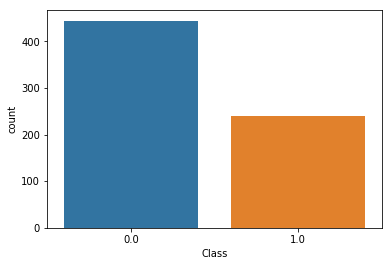

In [9]:
ax = sns.countplot(y,label="Count")
B, M = y.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

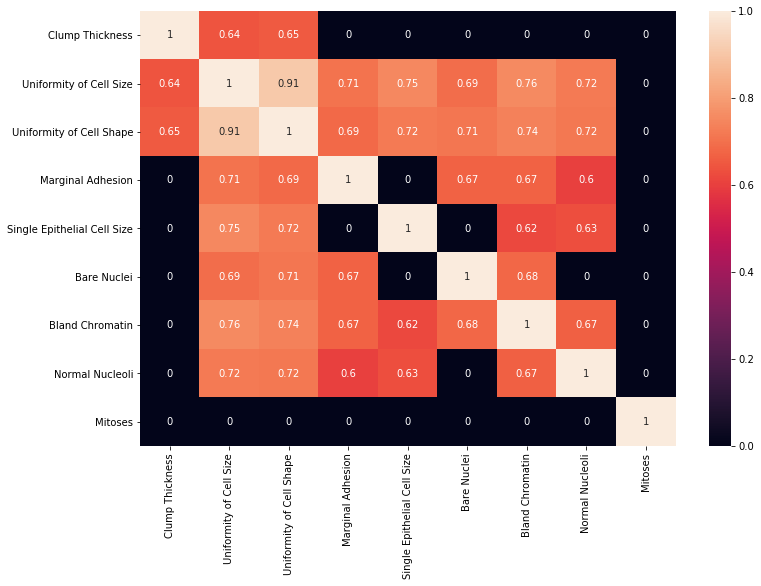

In [10]:
#correlation map highlighting coefficients > 60% correlation
corr_matrix = X.corr()
corr_matrix[np.abs(corr_matrix) < 0.6] = 0

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True)
plt.show()

## Using Ensemble Models to identify important features

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Feature ranking:
1. feature 1 (0.326930)
2. feature 2 (0.249881)
3. feature 5 (0.146526)
4. feature 6 (0.137774)
5. feature 0 (0.042417)
6. feature 4 (0.029761)
7. feature 3 (0.027692)
8. feature 7 (0.022765)
9. feature 8 (0.016252)


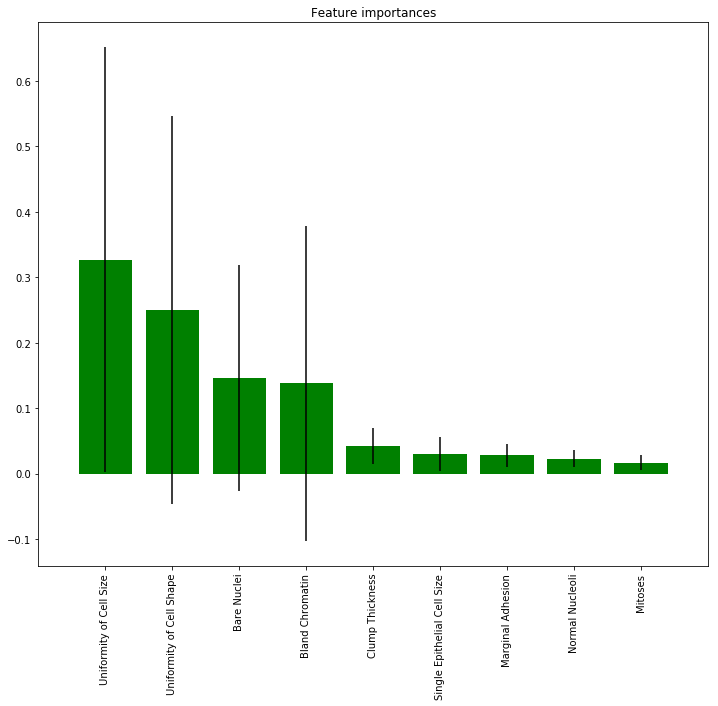

In [13]:
X_col = X.columns

importances = rf_clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(12, 10))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), X_col[indices],rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


## Standardise feature to enable distance metrics

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
X = StandardScaler().fit_transform(X.values)
X = pd.DataFrame(X, columns=X_col)

c:\users\salimn.middleeast\appdata\local\conda\conda\envs\udemy\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [16]:
X.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,0.197905,-0.702212,-0.741774,-0.639366,-0.555608,-0.698853,-0.181827,-0.612927,-0.3484
1,0.197905,0.277252,0.262783,0.758032,1.695166,1.772867,-0.181827,-0.285105,-0.3484
2,-0.511643,-0.702212,-0.741774,-0.639366,-0.555608,-0.424217,-0.181827,-0.612927,-0.3484
3,0.552679,1.583204,1.602192,-0.639366,-0.105454,0.125054,-0.181827,1.354008,-0.3484
4,-0.156869,-0.702212,-0.741774,0.059333,-0.555608,-0.698853,-0.181827,-0.612927,-0.3484


# Model and Fit data

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8, test_size=0.2,
                                                    random_state=42)

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
knn = KNeighborsClassifier(n_neighbors=5,
                           p=2, metric='minkowski')

In [21]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

# Evaluate Model

In [22]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [23]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test))))        

In [24]:
print_score(knn, X_train, y_train, X_test, y_test, train=True)
print_score(knn, X_train, y_train, X_test, y_test, train=False)

Train Result:

accuracy score: 0.9725

Classification Report: 
              precision    recall  f1-score   support

        0.0       0.98      0.98      0.98       365
        1.0       0.96      0.96      0.96       181

avg / total       0.97      0.97      0.97       546


Confusion Matrix: 
 [[358   7]
 [  8 173]]

Average Accuracy: 	 0.9635
Accuracy SD: 		 0.0162
Test Result:

accuracy score: 0.9562

Classification Report: 
              precision    recall  f1-score   support

        0.0       0.94      0.99      0.96        79
        1.0       0.98      0.91      0.95        58

avg / total       0.96      0.96      0.96       137


Confusion Matrix: 
 [[78  1]
 [ 5 53]]



# Visualise n-th dimension space

In [25]:
from sklearn.manifold import TSNE

In [26]:
#dimentional reduction to three components whilst maintaining relation
tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X_train)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 546 samples in 0.000s...
[t-SNE] Computed neighbors for 546 samples in 0.016s...
[t-SNE] Computed conditional probabilities for sample 546 / 546
[t-SNE] Mean sigma: 0.385018
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.425262
[t-SNE] Error after 300 iterations: 1.846514


In [27]:
y_pred = knn.predict(X_train)

#appending T-SNE components to training Dataframe 
df_tsne = X_train.copy()
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]
df_tsne['z-tsne'] = tsne_results[:,1]
df_tsne['class'] = y_pred

In [28]:
#project respective class
Benign_df = df_tsne.loc[df_tsne['class'] == 0]
Malignant_df =  df_tsne.loc[df_tsne['class'] == 1]

## Visualise in 3D space

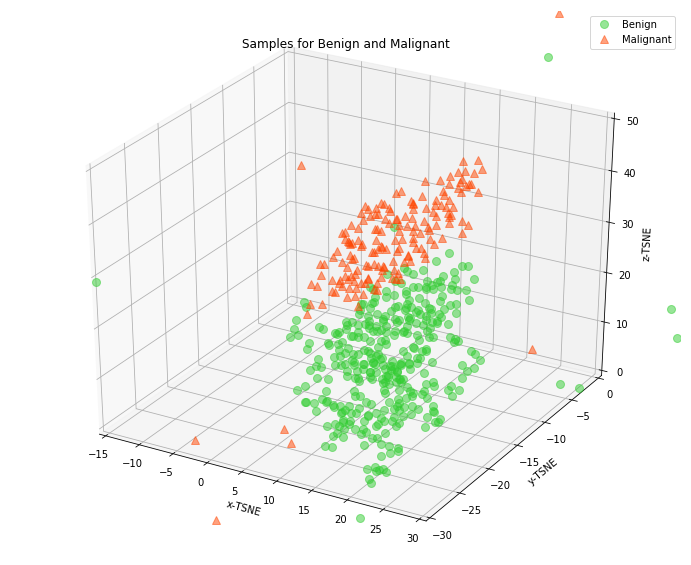

In [29]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d


fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(Benign_df['x-tsne'], Benign_df['y-tsne'], Benign_df['z-tsne'], \
        'o', markersize=8, color='limegreen', alpha=0.5, label='Benign')
ax.plot(Malignant_df['x-tsne'], Malignant_df['y-tsne'], Malignant_df['z-tsne'], \
        '^', markersize=8, alpha=0.5, color='orangered', label='Malignant')

plt.title('Samples for Benign and Malignant')

ax.set_ylim(-30,0)
ax.set_xlim(-15,30)
ax.set_zlim(0,50)

ax.set_xlabel('x-TSNE')
ax.set_ylabel('y-TSNE')
ax.set_zlabel('z-TSNE')
ax.legend(loc='upper right')
plt.show()

## Visualise in 2D space

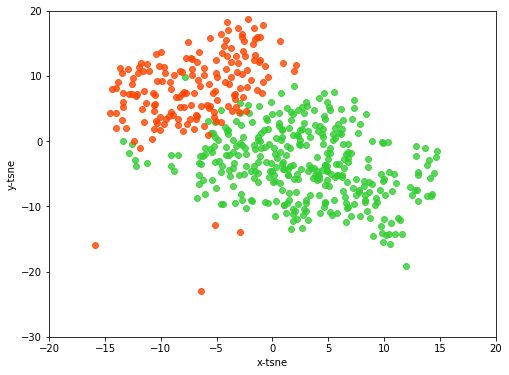

In [30]:
# Without regression fit:
plt.figure(figsize=(8,6))
plt.ylim(-30,20)
plt.xlim(-20,20)

sns.regplot(x=Benign_df['x-tsne'], y=Benign_df['y-tsne'],color='limegreen', fit_reg=False)
sns.regplot(x=Malignant_df['x-tsne'], y=Malignant_df['y-tsne'],color='orangered', fit_reg=False)
plt.show()

## Visualise in 1D space

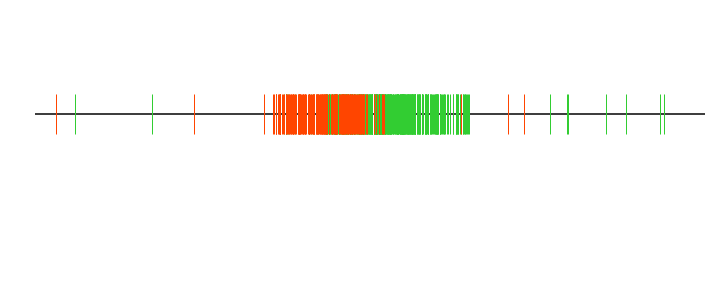

In [31]:
plt.figure(figsize=(12,5))
plt.hlines(1, -50, 50)
plt.ylim(-30,20)
plt.xlim(-50,50)

y = np.ones(np.shape(Benign_df['x-tsne']))
plt.plot(Benign_df['x-tsne'], y, '|', ms=40, color='limegreen')

y = np.ones(np.shape(Malignant_df['x-tsne']))
plt.plot(Malignant_df['x-tsne'], y, '|', ms=40, color='orangered')


plt.axis('off')
plt.show()